### 탐색적 데이터 분석

In [193]:
# 데이터 불러오기

import pandas as pd

df = pd.read_csv("./1st_train_mdf.csv")

In [194]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [195]:
# 필요한 라이브러리 실행
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [196]:
# 데이터 형태 
df.shape

(1460, 81)

In [197]:
# 데이터 속성
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [198]:
# 데이터 type별 개수
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [199]:
df.duplicated().sum()

0

In [200]:
# 결측값 확인
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [201]:
df.isnull().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [202]:
# 결측값 많은 순서대로 나열 (%)
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


<AxesSubplot:>

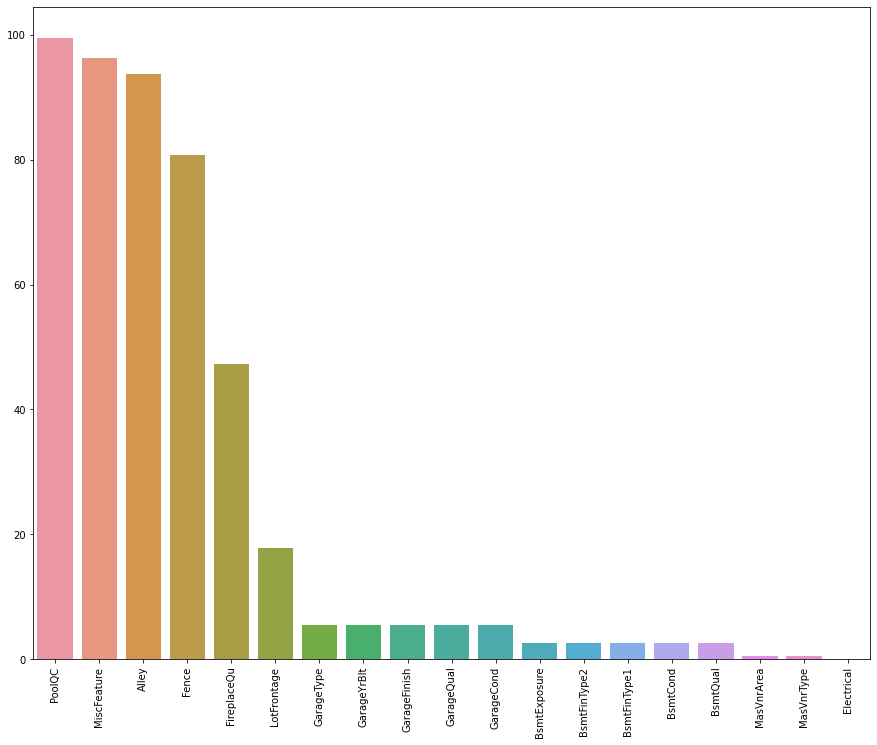

In [203]:
# 결측치 변수 시각화
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

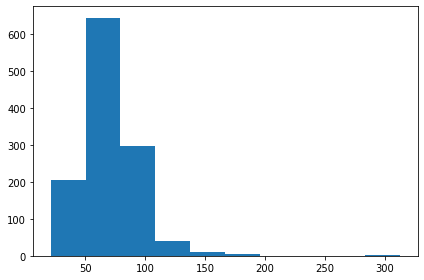

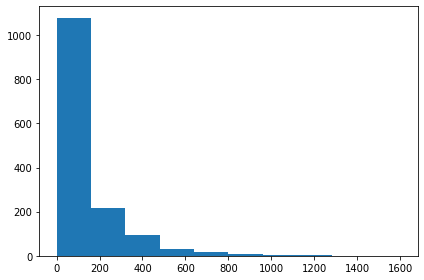

In [204]:
# 결측값이 존재하는 숫자형 변수의 분포 확인 
for i,v in enumerate(['LotFrontage', 'MasVnrArea']):
    plt.hist(df[v])
    plt.tight_layout()
    plt.show()

In [205]:
# object 변수 확인
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [206]:
li_obj = list(df_obj.columns)

In [207]:
li_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [208]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


In [209]:
li_num = list(df_num.columns)

In [210]:
li_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [211]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [212]:
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/156574345.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/156574345.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/156574345.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/156574345.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/156574345.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.g

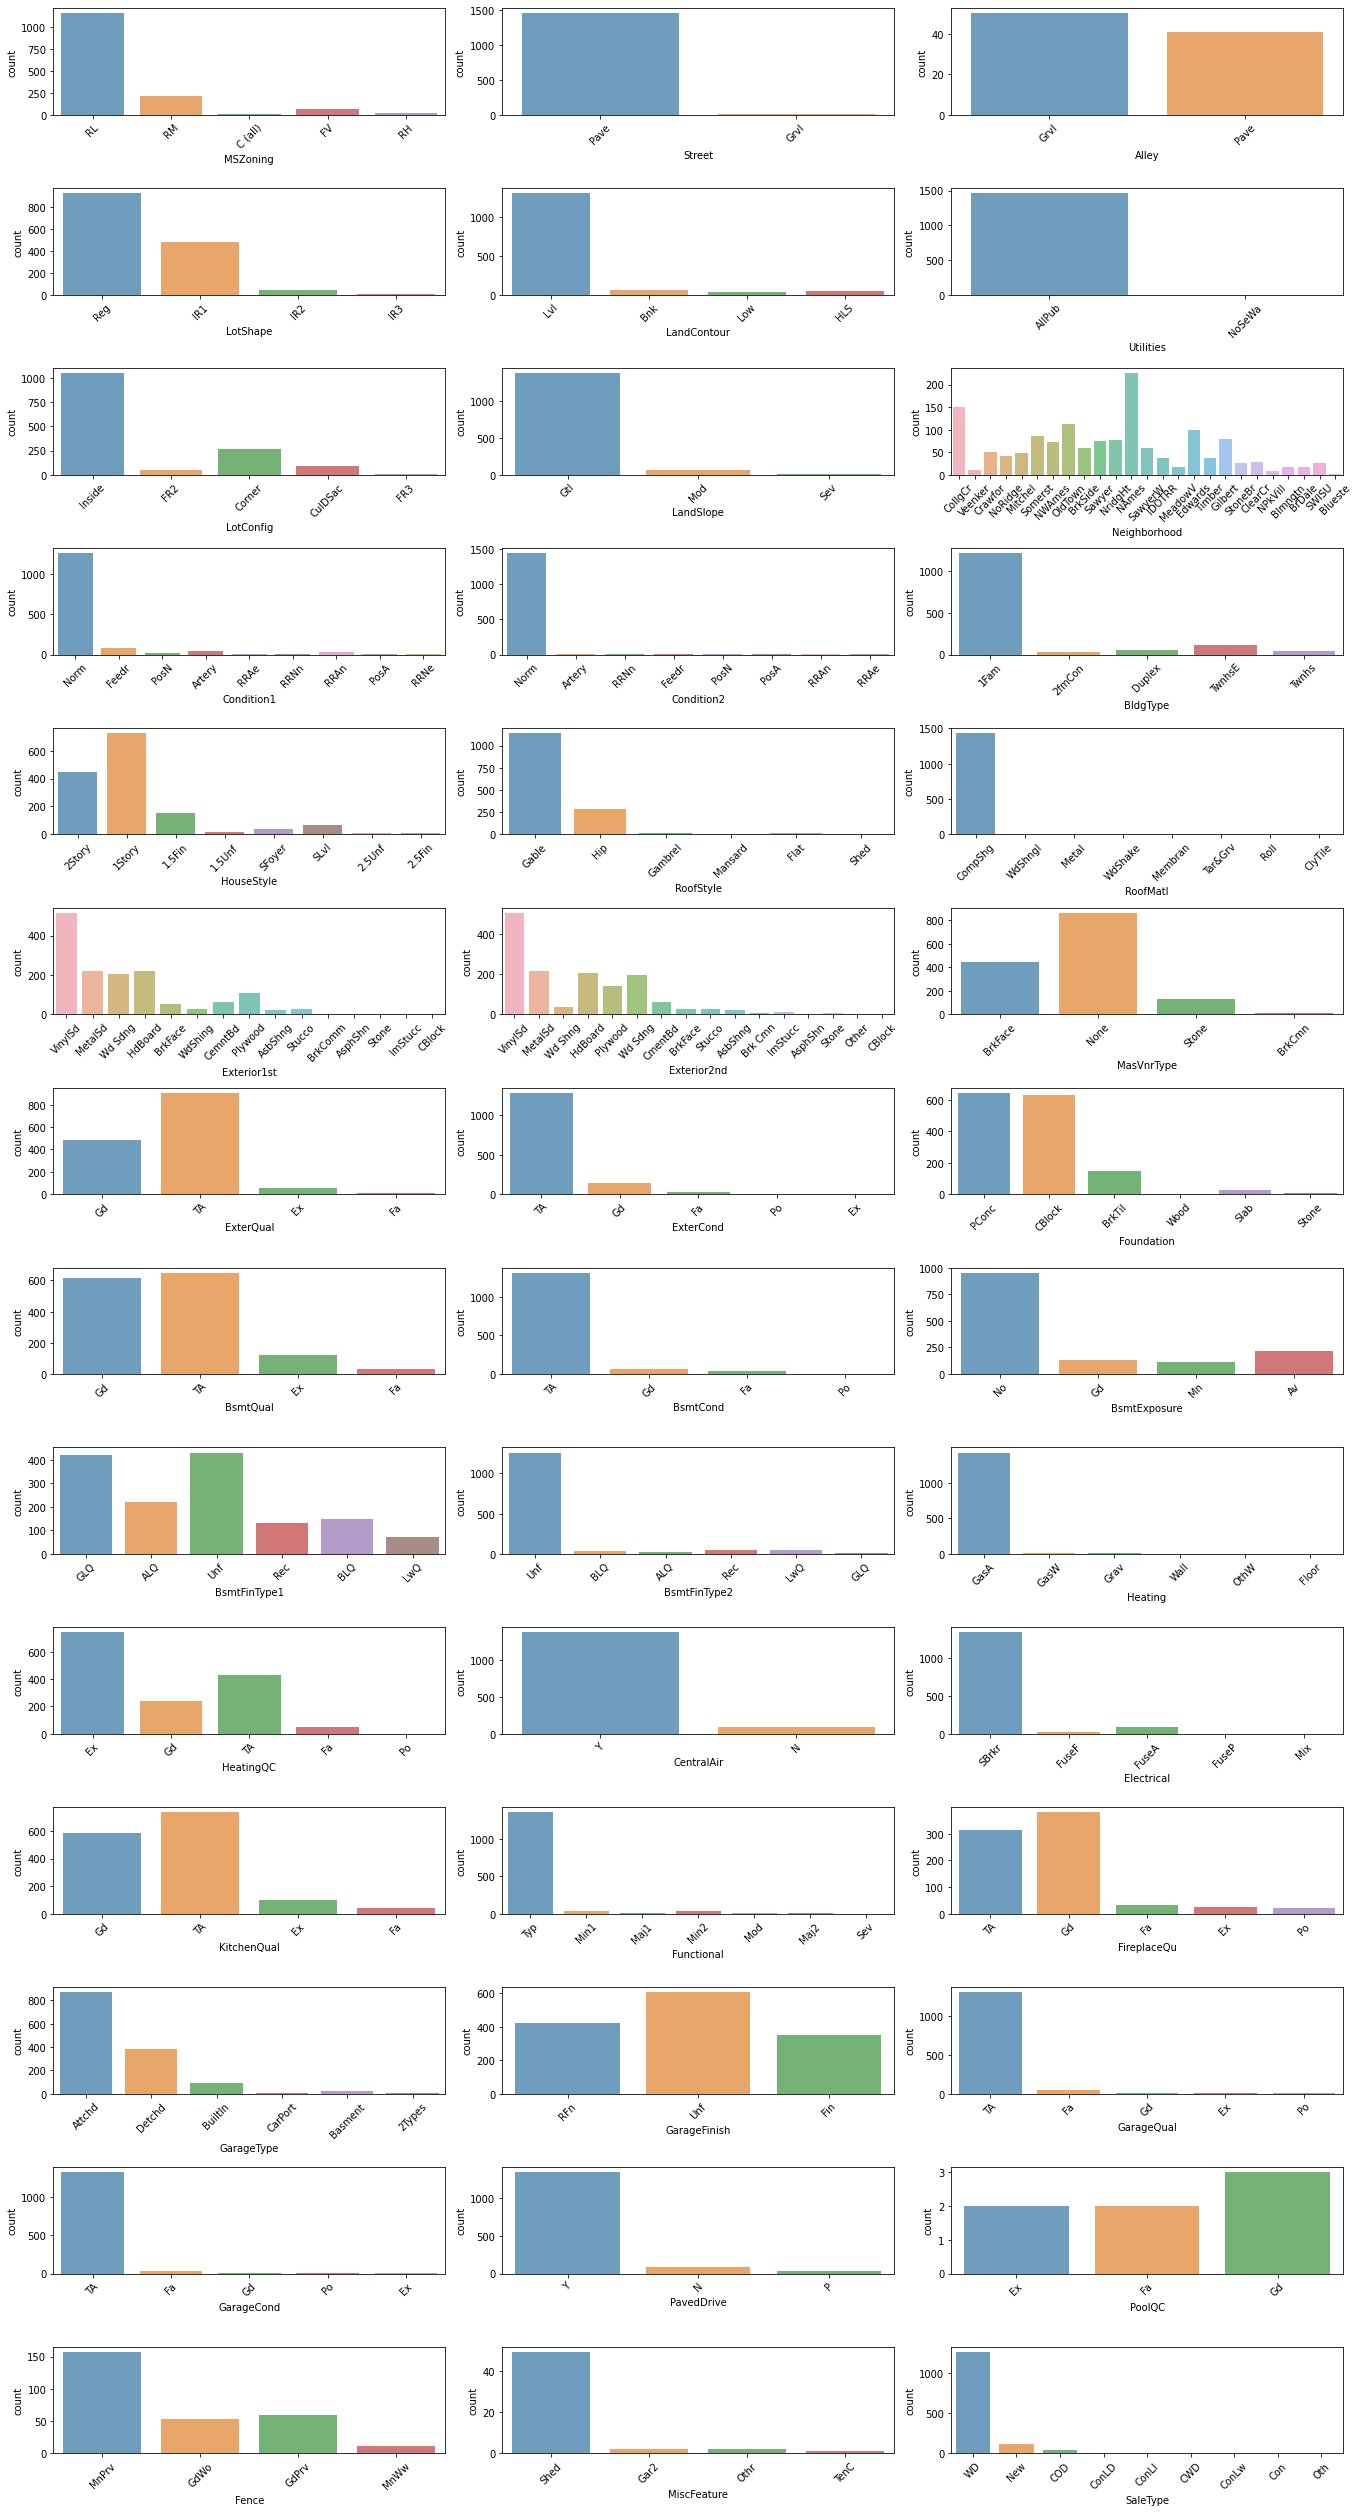

In [213]:
# 범주형 변수의 빈도수 시각화 (이항 변수, 다항 변수)
fig, axes = plt.subplots(round(len(df_obj.columns) / 3), 3, figsize=(19, 35))

for i, ax in enumerate(fig.axes):
    if i < len(df_obj.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_obj.columns[i], alpha=0.7, data=df_obj, ax=ax)

fig.tight_layout()

<AxesSubplot:ylabel='SalePrice'>

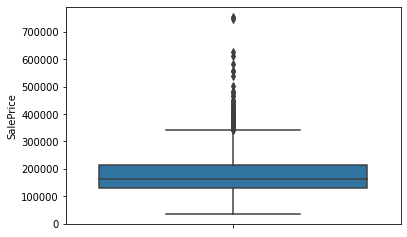

In [214]:
# 목적변수(y)인 'SalePrice'

sns.boxplot(y=df["SalePrice"])

<AxesSubplot:>

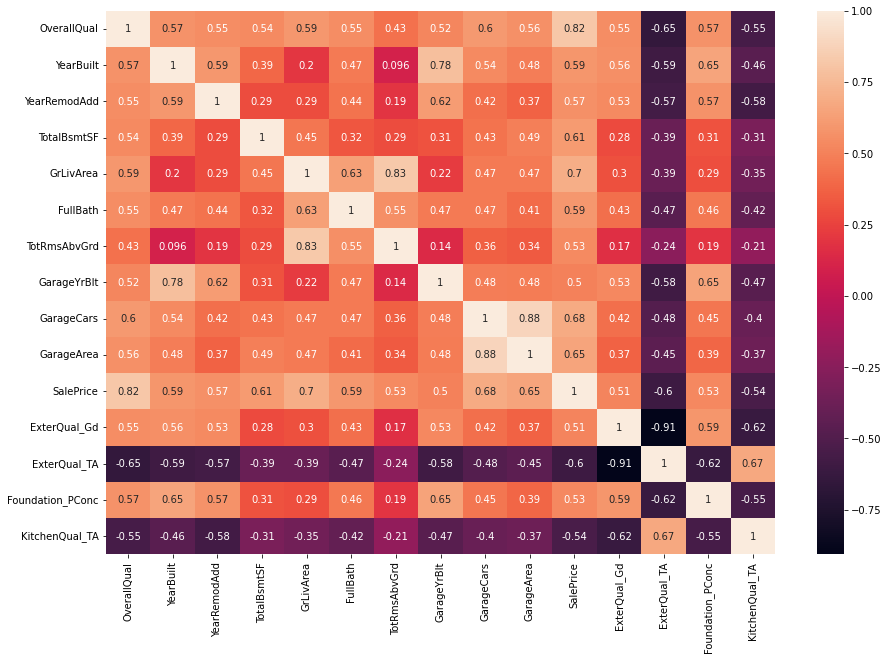

In [215]:
# 상관분석 
#  => 81개의 변수들의 상관관계를 모두 파악하기에는 어려움.
#  => 본래 데이터의 목적 변수인 'SalePrice'를 기준으로 상관관계가 0.5 이상인 변수들만의 hearmap 구현

cor = df_o.corr()
cor_fe = cor.index[abs(cor['SalePrice']) >= 0.5]
cor_fe

plt.figure(figsize=(15,10))
sns.heatmap(df_o[cor_fe].corr(),annot=True)

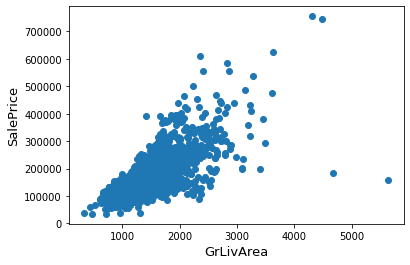

In [216]:
# [이상치 확인]
# 'GrLivArea' -> 'SalePrice'와 가장 높은 상관관계를 보임

fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [217]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [218]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

## 데이터 전처리

In [219]:
# [변수 TYPE]

# 'MSSubClass' 변수 -> 숫자로 변수가 표현되어있으나 object형임.
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [220]:
# [결측치 처리]

# 결측치 비율 높은 변수 제거
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [221]:
# 결측값 있는 숫자형 변수 -> 평균으로 결측값 대체
df.fillna(df.mean(), inplace=True)

C:\Users\0105l\AppData\Local\Temp/ipykernel_21852/2622211366.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [222]:
# 결측값 있는 나머지 범주형 변수 확인
null_count = df.isnull().sum()[df.isnull().sum()>0]
print(df.dtypes[null_count.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [223]:
# 결측치 처리 전 nan의 값에 의미가 있는 경우 -> 변수 변환
df_o = df
df_o['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No_Basement')
df_o['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No_Basement')
df_o['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No_Basement')
df_o['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No_Basement')
df_o['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No_Basement')

df_o['GarageType'] = df['GarageType'].replace(np.nan, 'No_Garage')
df_o['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No_Garage')
df_o['GarageQual'] = df['GarageQual'].replace(np.nan, 'No_Garage')
df_o['GarageCond'] = df['GarageCond'].replace(np.nan, 'No_Garage')

In [224]:
# [범주형 변수]
#  -> one-hot encoding
df_o = pd.get_dummies(df_o)

# shape값 확인
df.shape
df_o.shape

(1458, 280)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

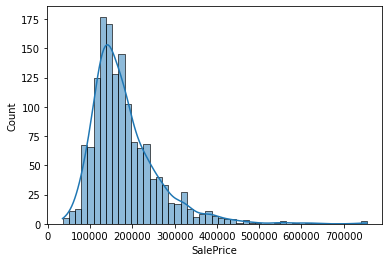

In [225]:
# [목표변수]
# -> 'SalePrice' 분포 확인
sns.histplot(df_o['SalePrice'], kde=True)

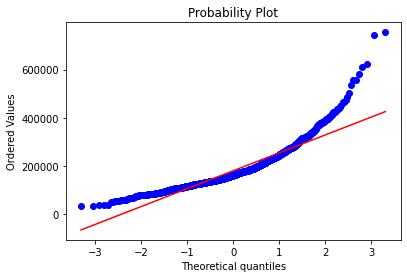

In [226]:
# QQ-plot 확인
fig = plt.figure()
res = stats.probplot(df_o['SalePrice'], plot=plt)
plt.show()

In [227]:
# skew되어 있는 'SalePrice' -> log변환 진행

original_SalePrice = df_o['SalePrice']
df_o['SalePrice'] = np.log1p(df_o['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

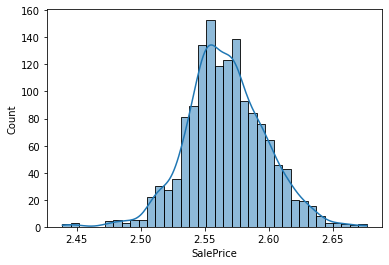

In [228]:
SalePrice_log = np.log1p(df_o['SalePrice'])
sns.histplot(SalePrice_log, kde=True)

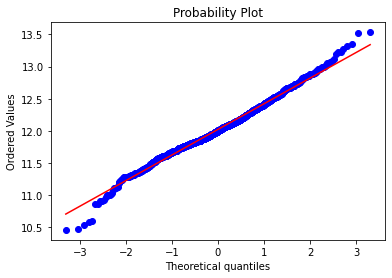

In [229]:
# QQ-plot 확인
fig = plt.figure()
res = stats.probplot(df_o['SalePrice'], plot=plt)
plt.show()

In [230]:
# [변수 변환]

df_o[['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch']].head()
df_o['TotalPorch'] = df_o['OpenPorchSF'] + df_o['EnclosedPorch'] + df_o['3SsnPorch'] + df_o['ScreenPorch']

In [231]:
df_o[['1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea']].head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
0,856,854,0,1710
1,1262,0,0,1262
2,920,866,0,1786
3,961,756,0,1717
4,1145,1053,0,2198


In [232]:
df_o[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145


In [233]:
df_o.drop(['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [234]:
df_o

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalPorch
0,1,60,65.0,8450,7,5,2003,2003,196.0,856,...,0,0,1,0,0,0,0,1,0,61
1,2,20,80.0,9600,6,8,1976,1976,0.0,1262,...,0,0,1,0,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,920,...,0,0,1,0,0,0,0,1,0,42
3,4,70,60.0,9550,7,5,1915,1970,0.0,756,...,0,0,1,1,0,0,0,0,0,307
4,5,60,84.0,14260,8,5,2000,2000,350.0,1145,...,0,0,1,0,0,0,0,1,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,953,...,0,0,1,0,0,0,0,1,0,40
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,1542,...,0,0,1,0,0,0,0,1,0,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,1152,...,0,0,1,0,0,0,0,1,0,60
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,1078,...,0,0,1,0,0,0,0,1,0,112


### 모델링

In [236]:
# X_features / y_target 나누기
X_features = df_o.drop(columns=['SalePrice'])
y_target = df_o['SalePrice']

In [237]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,  test_size=0.2, random_state=40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 270)
(292, 270)
(1166,)
(292,)


In [294]:
# 선형회귀, 라쏘, 릿지 모델 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train) 
y_predict = lr.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

0.11566786924612499


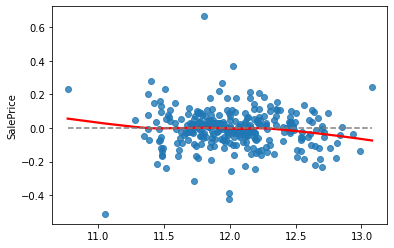

In [304]:
# 회귀분석 가정1) 선형성

residual = y_test - y_predict 
sns.regplot(y_predict, residual, lowess=True, line_kws={'color':'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


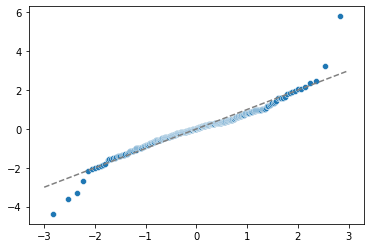

In [301]:
# 회귀분석 가정2) 정규성

residual = y_test - y_predict 

import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3,3], '--', color='grey')

In [302]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9399452209472656, pvalue=1.6146151082807592e-09)

<AxesSubplot:ylabel='SalePrice'>

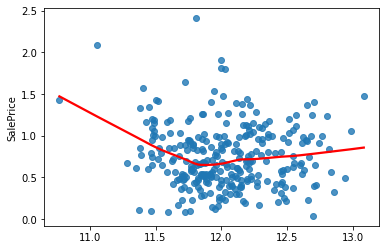

In [306]:
# 회귀분석 가정3) 등분산성
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

In [313]:
!pip install statsmodels

In [325]:
# 회귀분석 가정4) 독립성
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residual)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 2.112948966407264


In [253]:
from sklearn.metrics import r2_score
print("Coefficient :", ridge.coef_,
      "Intercept :", ridge.intercept_)
print()
print('train(cv) r2_score :', r2_score(y_train, ridge.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, ridge.predict(X_test)))

Coefficient : [-4.23840846e-06 -1.05409512e-04  4.51243035e-04  2.47721622e-06
  4.00514363e-02  3.89300428e-02  1.46381785e-03  5.86835411e-04
  3.10630001e-06  1.02566688e-04  2.57048582e-04  3.71908819e-02
  1.37907633e-02  1.65754346e-02  2.09564386e-02 -2.07527665e-03
 -1.84504079e-02  5.62176177e-03  1.80562593e-02 -1.92844515e-04
  3.16567308e-02  7.53418742e-05  1.13278186e-04  2.02416862e-04
  2.11838840e-07  2.02880168e-04 -1.86931124e-03 -2.95658197e-01
  1.16246924e-01  1.06046802e-01  5.74753373e-02  1.58891332e-02
 -6.25024700e-02  6.25024700e-02 -9.20739196e-03  1.69446871e-02
 -1.56055280e-04 -7.58123987e-03 -2.16812488e-03  1.01486118e-02
 -1.99321067e-02  1.19516198e-02  5.23223019e-02 -5.23223019e-02
  8.83002660e-03  4.37869008e-02 -5.48305665e-03 -4.25493465e-02
 -4.58452432e-03  3.23413733e-02  7.34497618e-02 -1.05791135e-01
 -4.78955127e-04 -4.63694479e-03 -3.48446681e-02  1.86364228e-02
  1.05078809e-02 -7.18345196e-03  1.12641071e-01 -5.89193328e-02
  3.2748057

In [328]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

0.10763304104229524


In [329]:
from sklearn.metrics import r2_score
print("Coefficient :", ridge.coef_,
      "Intercept :", ridge.intercept_)
print()
print('train(cv) r2_score :', r2_score(y_train, ridge.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, ridge.predict(X_test)))

Coefficient : [-4.23840846e-06 -1.05409512e-04  4.51243035e-04  2.47721622e-06
  4.00514363e-02  3.89300428e-02  1.46381785e-03  5.86835411e-04
  3.10630001e-06  1.02566688e-04  2.57048582e-04  3.71908819e-02
  1.37907633e-02  1.65754346e-02  2.09564386e-02 -2.07527665e-03
 -1.84504079e-02  5.62176177e-03  1.80562593e-02 -1.92844515e-04
  3.16567308e-02  7.53418742e-05  1.13278186e-04  2.02416862e-04
  2.11838840e-07  2.02880168e-04 -1.86931124e-03 -2.95658197e-01
  1.16246924e-01  1.06046802e-01  5.74753373e-02  1.58891332e-02
 -6.25024700e-02  6.25024700e-02 -9.20739196e-03  1.69446871e-02
 -1.56055280e-04 -7.58123987e-03 -2.16812488e-03  1.01486118e-02
 -1.99321067e-02  1.19516198e-02  5.23223019e-02 -5.23223019e-02
  8.83002660e-03  4.37869008e-02 -5.48305665e-03 -4.25493465e-02
 -4.58452432e-03  3.23413733e-02  7.34497618e-02 -1.05791135e-01
 -4.78955127e-04 -4.63694479e-03 -3.48446681e-02  1.86364228e-02
  1.05078809e-02 -7.18345196e-03  1.12641071e-01 -5.89193328e-02
  3.2748057

In [265]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

0.1708404628337525


In [266]:
from sklearn.metrics import r2_score
print("Coefficient :", lasso.coef_,
      "Intercept :", lasso.intercept_)
print()
print('train(cv) r2_score :', r2_score(y_train, lasso.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, lasso.predict(X_test)))

Coefficient : [-2.82110150e-07 -0.00000000e+00  0.00000000e+00  2.13918814e-06
  0.00000000e+00  0.00000000e+00  2.32236790e-03  9.21005500e-04
  3.85943774e-05  2.49739217e-04  3.54504121e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.66885124e-04  1.29769101e-04  0.00000000e+00
 -2.71864560e-06  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.0000000

In [334]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge, ridge_params)
best_lasso = print_best_params(lasso, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1142, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1135, 최적 alpha:{'alpha': 0.001}


In [335]:
ridge = Ridge(alpha=12)
ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

print('train(cv) r2_score :', r2_score(y_train, ridge.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, ridge.predict(X_test)))

0.10328570585101869
train(cv) r2_score : 0.9395888308715223
test(cv) r2_score : 0.9271018362335306


In [338]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

print('train(cv) r2_score :', r2_score(y_train, lasso.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, lasso.predict(X_test)))

0.10297244077566922
train(cv) r2_score : 0.9308038221842972
test(cv) r2_score : 0.9275433652361109


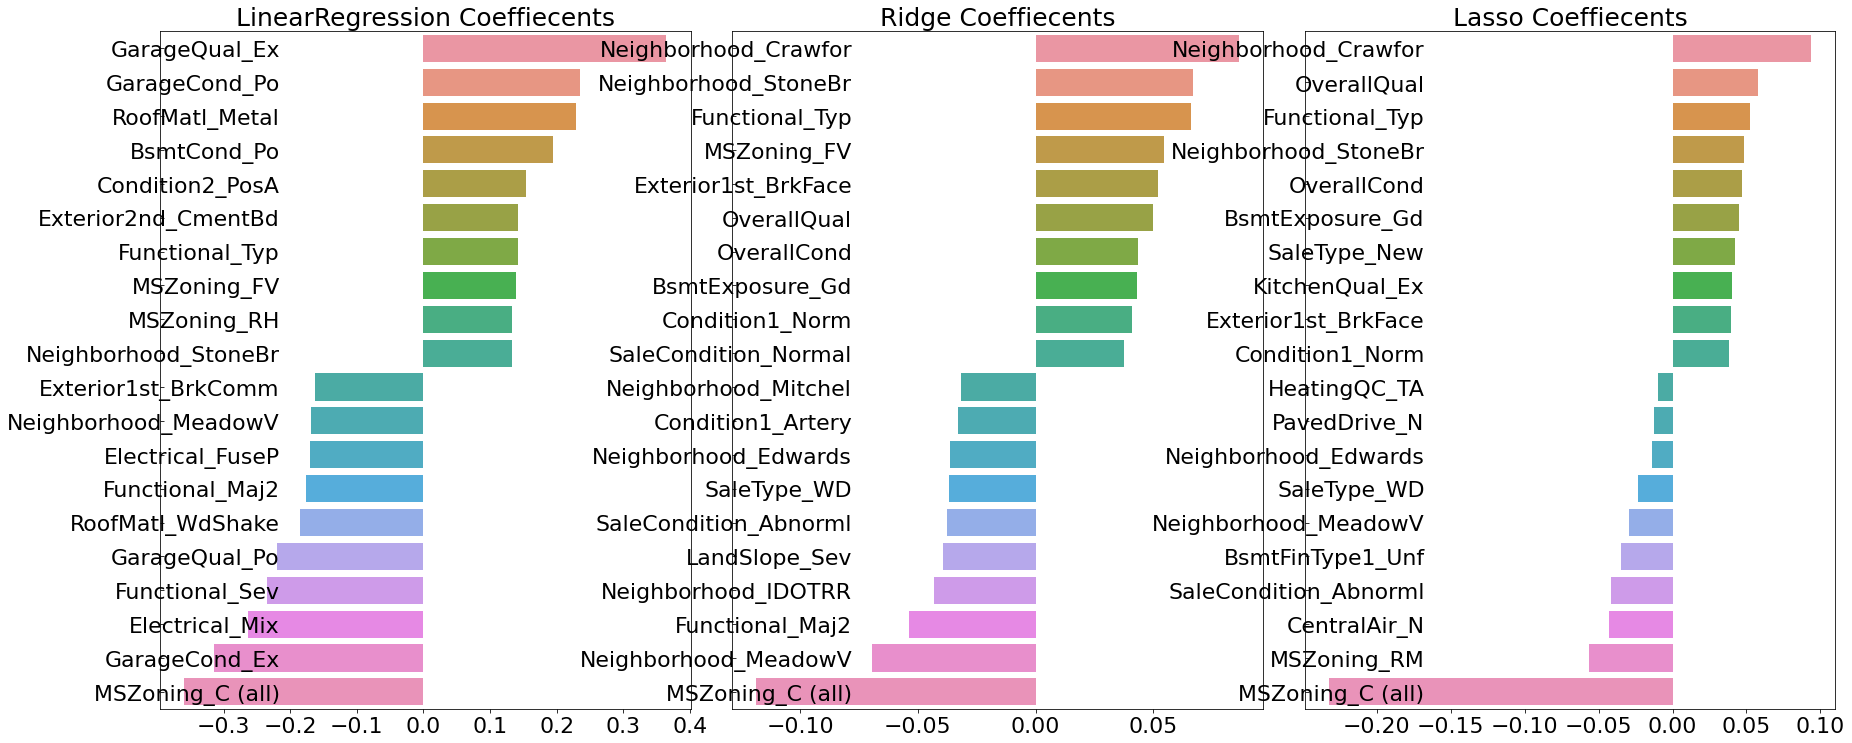

In [339]:
def get_top_bottom_coef(model):
   
    coef = pd.Series(model.coef_, index=X_features.columns)


    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):

    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
 
    for i_num, model in enumerate(models):

        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
       
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 회귀 계수 시각화.    
models = [lr, ridge, lasso]
visualize_coefficient(models)

In [340]:
# xgboost

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
xgb_reg.fit(X_train, y_train)
y_predict = xgb_reg.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

0.10627512470779606


In [341]:
print('train(cv) r2_score :', r2_score(y_train, xgb_reg.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, xgb_reg.predict(X_test)))

train(cv) r2_score : 0.9999789577635759
test(cv) r2_score : 0.9228209565092127


In [342]:
# lightgbm  

from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
lgbm_reg.fit(X_train, y_train)
y_predict = lgbm_reg.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

0.10832942609307546


In [343]:
print('train(cv) r2_score :', r2_score(y_train, lgbm_reg.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, lgbm_reg.predict(X_test)))

train(cv) r2_score : 0.9607992350399789
test(cv) r2_score : 0.9198083720489744


In [277]:
# catboost

from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(depth=8, iterations=5000)
cat_reg.fit(X_train, y_train)
y_predict = cat_reg.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict)**0.5
print(RMSE)

Learning rate set to 0.011336
0:	learn: 0.4008372	total: 161ms	remaining: 13m 23s
1:	learn: 0.3977208	total: 177ms	remaining: 7m 23s
2:	learn: 0.3948161	total: 195ms	remaining: 5m 25s
3:	learn: 0.3921185	total: 207ms	remaining: 4m 19s
4:	learn: 0.3891728	total: 219ms	remaining: 3m 39s
5:	learn: 0.3863403	total: 230ms	remaining: 3m 11s
6:	learn: 0.3837209	total: 237ms	remaining: 2m 49s
7:	learn: 0.3808112	total: 249ms	remaining: 2m 35s
8:	learn: 0.3782186	total: 262ms	remaining: 2m 25s
9:	learn: 0.3755980	total: 274ms	remaining: 2m 16s
10:	learn: 0.3728206	total: 286ms	remaining: 2m 9s
11:	learn: 0.3703096	total: 298ms	remaining: 2m 3s
12:	learn: 0.3675927	total: 309ms	remaining: 1m 58s
13:	learn: 0.3649408	total: 321ms	remaining: 1m 54s
14:	learn: 0.3622810	total: 333ms	remaining: 1m 50s
15:	learn: 0.3599937	total: 343ms	remaining: 1m 46s
16:	learn: 0.3575535	total: 355ms	remaining: 1m 44s
17:	learn: 0.3550862	total: 367ms	remaining: 1m 41s
18:	learn: 0.3527026	total: 378ms	remaining: 

In [344]:
print('train(cv) r2_score :', r2_score(y_train, cat_reg.predict(X_train)))
print('test(cv) r2_score :', r2_score(y_test, cat_reg.predict(X_test)))

train(cv) r2_score : 0.999165324251064
test(cv) r2_score : 0.9258424429614559


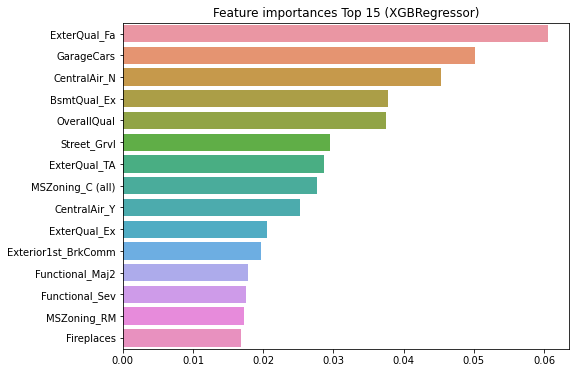

In [351]:
# xgboost 변수 중요도 추출

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

gbcl_importances_values = xgb_reg.feature_importances_
gbcl_importances = pd.Series(gbcl_importances_values, index=X_train.columns)
gbcl_top20 = gbcl_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 15 (XGBRegressor)')
sns.barplot(x=gbcl_top20, y=gbcl_top20.index)
plt.show()

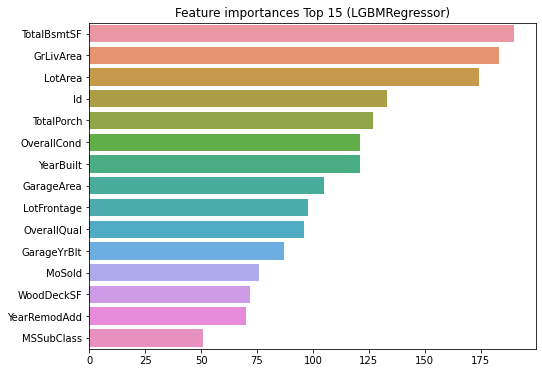

In [349]:
# lightgbm 변수 중요도 추출

gbcl_importances_values = lgbm_reg.feature_importances_
gbcl_importances = pd.Series(gbcl_importances_values, index=X_train.columns)
gbcl_top20 = gbcl_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 15 (LGBMRegressor)')
sns.barplot(x=gbcl_top20, y=gbcl_top20.index)
plt.show()

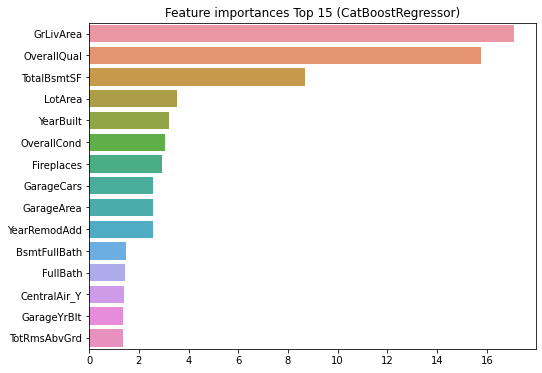

In [350]:
# cat_reg 변수 중요도 추출

gbcl_importances_values = cat_reg.feature_importances_
gbcl_importances = pd.Series(gbcl_importances_values, index=X_train.columns)
gbcl_top20 = gbcl_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 15 (CatBoostRegressor)')
sns.barplot(x=gbcl_top20, y=gbcl_top20.index)
plt.show()